In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
country = pd.read_csv("Country-data.csv")

In [3]:
# Let's see the head of our dataset
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Sanity Check
country.shape
country.describe()
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
#Na Handling
country.isnull().values.any()
country.isnull().values.sum()
country.isnull().sum()*100/country.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


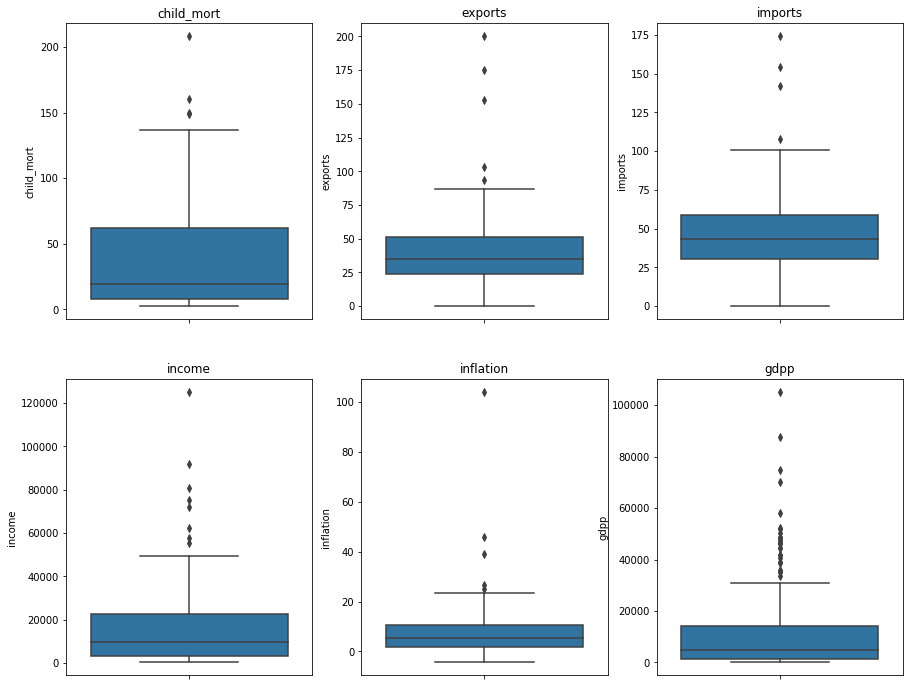

In [7]:
# subplots
plt.figure(figsize=(15,12))
# subplot 1
plt.subplot(2, 3, 1)
plt.title('child_mort')
sns.boxplot(y = country['child_mort'])

# subplot 2
plt.subplot(2, 3, 2)
plt.title('exports')
sns.boxplot(y = country['exports'])

# subplot 3
plt.subplot(2, 3, 3)
plt.title('imports')
sns.boxplot(y = country['imports'])

# subplot 4
plt.subplot(2, 3, 4)
plt.title('income')
sns.boxplot(y = country['income'])

# subplot 5
plt.subplot(2,3,5)
plt.title('inflation')
sns.boxplot(y = country['inflation'])

# subplot 5
plt.subplot(2,3,6)
plt.title('gdpp')
sns.boxplot(y = country['gdpp'])

plt.show()


In [113]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(country.drop('country', axis = 1).transpose())

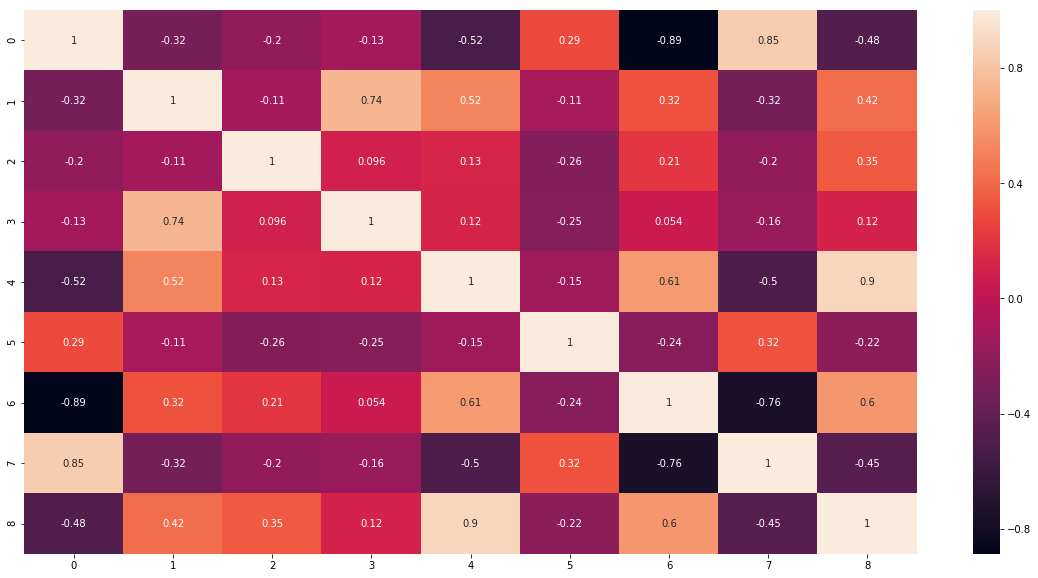

In [114]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [8]:
df_norm = country

In [9]:
df = country

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [11]:
# standardise all parameters
df_norm = df.drop("country", axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df_norm)

In [12]:
df_norm = pd.DataFrame(df_norm)
df_norm.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### PCA

In [13]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [14]:
#Doing the PCA on the train data
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [15]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [16]:
colnames = list(df_norm.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


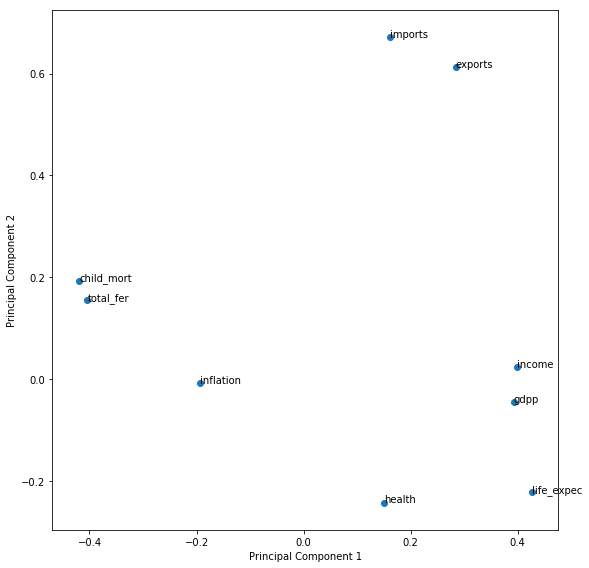

In [17]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [18]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

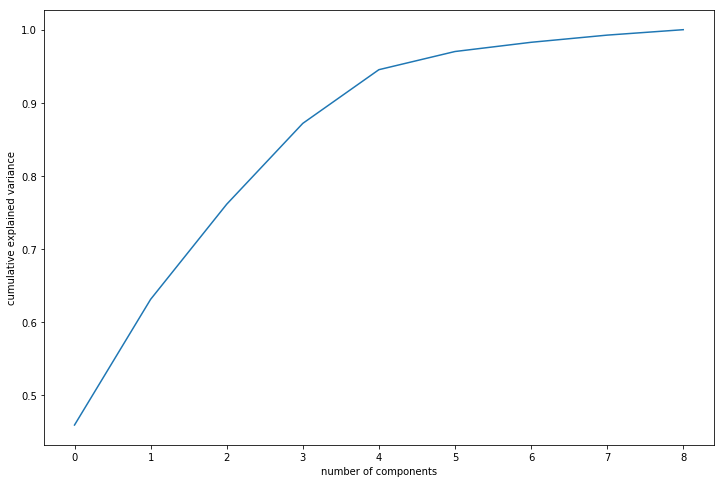

In [19]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4  components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our modeling

In [20]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs

In [21]:
df_norm_pca = pca_final.fit_transform(df_norm)
df_norm_pca.shape

(167, 4)

### Outlier Treatment

In [22]:
df_out = pd.DataFrame(df_norm_pca)

In [23]:
df_out = pd.concat([df['country'], df_out], axis=1)

In [24]:
df_out.columns = ['country','pc1','pc2','pc3','pc4']

In [25]:
df_out.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,pc1,pc2,pc3,pc4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.659217e-17,1.429329e-17,-2.476396e-17,1.662011e-17
std,2.039726e+00,1.247144e+00,1.083371e+00,1.000238e+00
min,-4.878925e+00,-2.991196e+00,-5.590269e+00,-1.582161e+00
25%,-1.383574e+00,-7.481349e-01,-4.154744e-01,-7.901529e-01
50%,2.418370e-02,-9.344038e-02,1.937511e-01,-2.939462e-01
75%,1.224232e+00,5.568934e-01,5.140716e-01,7.090722e-01
90%,2.461331e+00,1.276336e+00,1.067970e+00,1.226926e+00
95%,3.105192e+00,1.716160e+00,1.465341e+00,1.775725e+00
99%,4.761754e+00,4.808004e+00,2.531317e+00,2.780284e+00


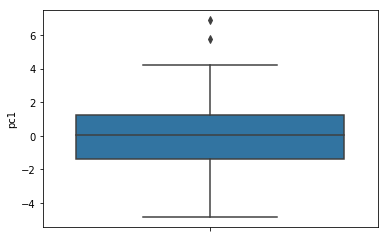

In [26]:
# outlier treatment for pc1
sns.boxplot(y = df_out.pc1)
Q1 = df_out.pc1.quantile(0.25)
Q3 = df_out.pc1.quantile(0.75)
IQR = Q3 - Q1
df_out_treated = df_out[(df_out.pc1 >= Q1 - 1.5*IQR) & (df_out.pc1 <= Q3 + 1.5*IQR)]
plt.show()

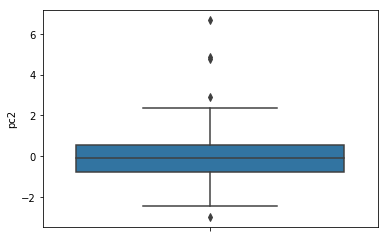

In [28]:
# outlier treatment for pc1
sns.boxplot(y = df_out.pc2)
Q1 = df_out.pc2.quantile(0.25)
Q3 = df_out.pc2.quantile(0.75)
IQR = Q3 - Q1
df_out_treated = df_out[(df_out.pc2 >= Q1 - 1.5*IQR) & (df_out.pc2 <= Q3 + 1.5*IQR)]
plt.show()

In [29]:
print(df_out_treated.shape)
print('----------------------------')
df_out_treated.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(162, 5)
----------------------------


,pc1,pc2,pc3,pc4
count,162.000000,162.000000,162.000000,162.000000
mean,-0.127347,-0.100361,-0.011080,-0.024974
std,1.903856,0.958467,1.082776,0.952653
min,-4.878925,-2.447021,-5.590269,-1.582161
25%,-1.502982,-0.754778,-0.398492,-0.795668
50%,0.006138,-0.094478,0.193337,-0.299542
75%,1.160900,0.541133,0.493524,0.686802
90%,2.333472,1.153051,0.959693,1.188948
95%,2.809998,1.390017,1.434159,1.754309
99%,3.863251,2.097996,2.536140,2.530560


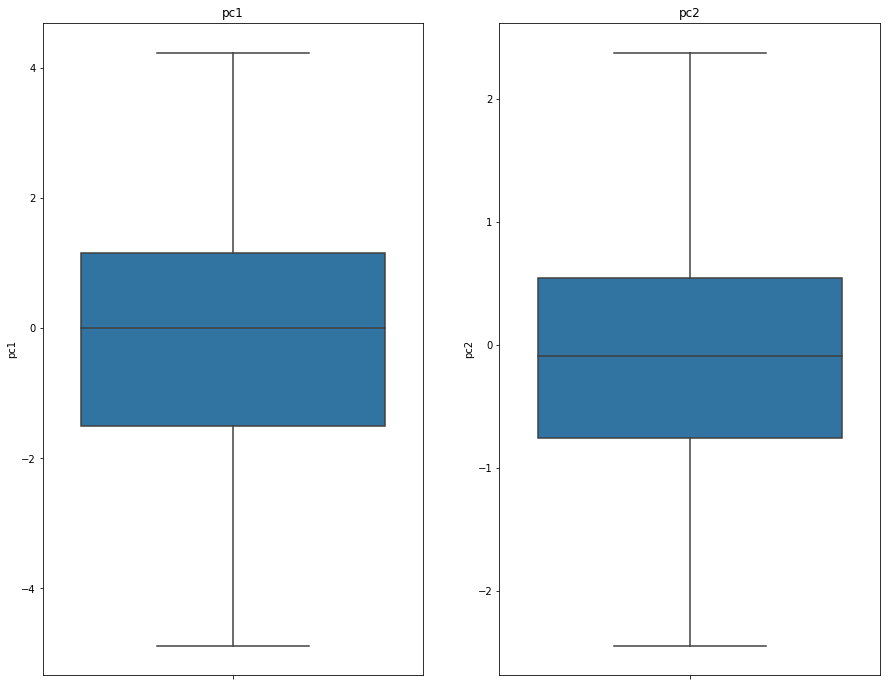

In [30]:
# subplots
plt.figure(figsize=(15,12))
# subplot 1
plt.subplot(1, 2, 1)
plt.title('pc1')
sns.boxplot(y = df_out_treated['pc1'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('pc2')
sns.boxplot(y = df_out_treated['pc2'])

plt.show()

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [31]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_norm_pca.transpose())

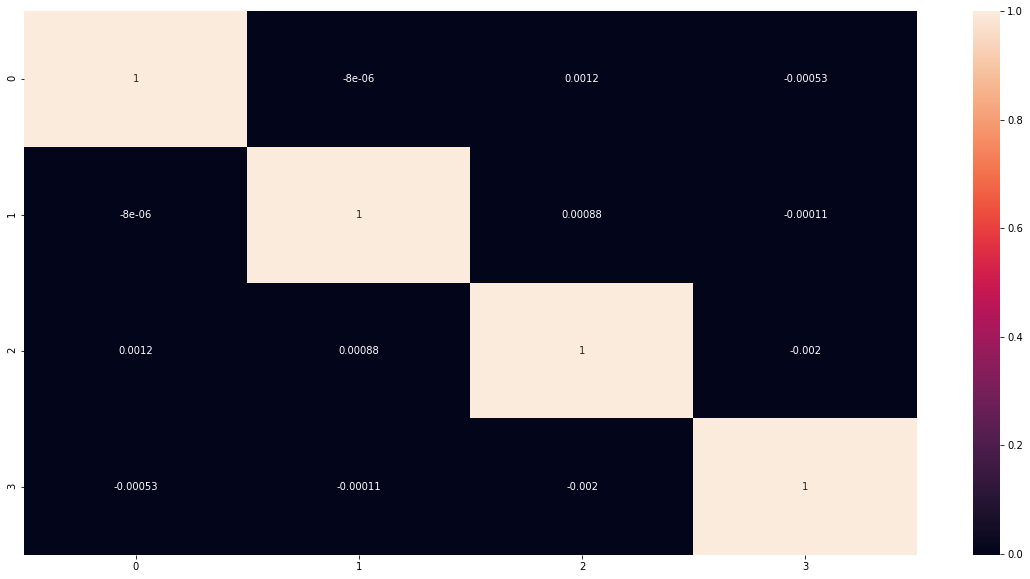

In [32]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [33]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092544112 , min corr:  -0.002037829535552029


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [50]:
df_merged = df.merge(pd.DataFrame(df_out_treated['country']),how = 'left',on = 'country', indicator = True)

In [51]:
print(df_merged.shape)
print('------------')
#df_merged.tail(n = 10)
df_outlier = df_merged[df_merged['_merge'] == 'left_only']
df_final = df_merged[df_merged['_merge'] == 'both'].drop('_merge', axis = 1)

(167, 11)
------------


In [52]:
df_out_pca = df_out_treated.drop("country", axis=1)

In [53]:
df_out_pca.head()

,pc1,pc2,pc3,pc4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [43]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
hopkins(df_out_pca)

0.7983527598291508

In [48]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_out_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
df_final.index = pd.RangeIndex(len(df_final.index))
df_km = pd.concat([df_final, pd.Series(model_clus4.labels_)], axis=1)
df_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [55]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


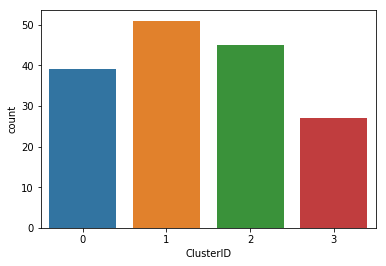

In [79]:
sns.countplot(x = "ClusterID", data = df_km)
plt.show()

In [56]:
df_km[['country','ClusterID']]

,country,ClusterID
0,Afghanistan,2
1,Albania,1
2,Algeria,0
3,Angola,2
4,Antigua and Barbuda,1
5,Argentina,0
6,Armenia,0
7,Australia,3
8,Austria,3
9,Azerbaijan,0


In [57]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_out_pca)
    sse_.append([k, silhouette_score(df_out_pca, kmeans.labels_)])

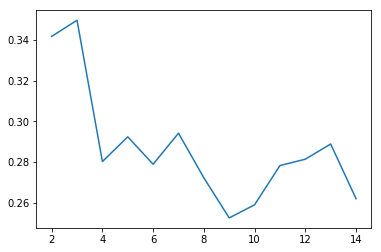

In [58]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

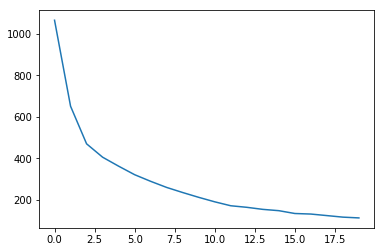

In [59]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_out_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### Since the above mentioned Scree Plot shows us that 4 clusters are more than enough for making segmentation or taking decisions.
### Therefore we will go with 4 cluster formation.

In [80]:
km_clusters_child_mort = 	pd.DataFrame(df_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_income = 	pd.DataFrame(df_km.groupby(["ClusterID"]).income.mean())
km_clusters_exports = 	pd.DataFrame(df_km.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(df_km.groupby(["ClusterID"]).imports.mean())
km_clusters_inflation = 	pd.DataFrame(df_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_health = 	pd.DataFrame(df_km.groupby(["ClusterID"]).health.mean())
km_clusters_gdpp = 	pd.DataFrame(df_km.groupby(["ClusterID"]).gdpp.mean())
km_clusters_life_expec = 	pd.DataFrame(df_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_km.groupby(["ClusterID"]).total_fer.mean())

In [81]:
df_km_pca = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_income, km_clusters_exports,
               km_clusters_imports,km_clusters_inflation,km_clusters_health,km_clusters_gdpp,
               km_clusters_life_expec,km_clusters_total_fer], axis=1)
df_km_pca.columns = ["ClusterID", "child_mort_mean", "income_mean", "exports_mean",'imports_mean'
              ,'inflation_mean','health_mean','gdpp_mean','life_expec_mean','total_fer_mean']
df_km_pca.head()

,ClusterID,child_mort_mean,income_mean,exports_mean,imports_mean,inflation_mean,health_mean,gdpp_mean,life_expec_mean,total_fer_mean
0,0,27.853846,13026.923077,29.986897,30.729895,12.404513,5.321795,6241.435897,72.371795,2.558718
1,1,17.021569,13470.980392,49.800000,59.509804,3.936824,7.055294,7970.509804,73.317647,2.125686
2,2,94.857778,3493.177778,28.289111,43.026667,11.816111,6.407778,1713.377778,58.926667,5.038667
3,3,4.962963,46259.259259,46.248148,39.525926,2.921222,8.919259,44670.370370,80.481481,1.819630


## Heirarchical Clustering

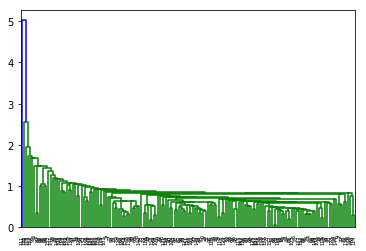

In [62]:
# heirarchical clustering
mergings = linkage(df_out_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

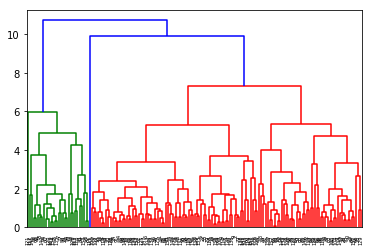

In [63]:
mergings = linkage(df_out_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [64]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
RFM_hc = pd.concat([df_final, clusterCut], axis=1)
RFM_hc.columns = ["country", "child_mort", "income", "exports",'imports'
              ,'inflation','health','gdpp','life_expec','total_fer',"ClusterID"]

In [65]:
#summarise
km_clusters_child_mort = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_income = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).income.mean())
km_clusters_exports = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_inflation = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_health = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).health.mean())
km_clusters_gdpp = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).gdpp.mean())
km_clusters_life_expec = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).total_fer.mean())

In [66]:
df_hc_pca = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_income, km_clusters_exports,
               km_clusters_imports,km_clusters_inflation,km_clusters_health,km_clusters_gdpp,
               km_clusters_life_expec,km_clusters_total_fer], axis=1)
df_hc_pca.columns = ["ClusterID", "child_mort_mean", "income_mean", "exports_mean",'imports_mean'
              ,'inflation_mean','health_mean','gdpp_mean','life_expec_mean','total_fer_mean']
df_hc_pca.head()

,ClusterID,child_mort_mean,income_mean,exports_mean,imports_mean,inflation_mean,health_mean,gdpp_mean,life_expec_mean,total_fer_mean
0,0,84.454000,33.698400,6.599800,50.074000,3887.660000,8.184700,59.832000,4.648800,1883.880000
1,1,22.485185,37.924432,6.305185,43.689702,12657.160494,8.032272,73.307407,2.316667,7282.592593
2,2,6.100000,48.296667,8.358667,39.230000,45883.333333,4.376767,79.880000,1.938000,41556.666667
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


#### From Hierarchical Clustering we can finally conclude that 4 clusters are perfect choice for decision taking and segmentation
### Later we will take clusters from K-means clustering formation for our problem statement.
### Since both the processes are giving similar results we will proceed with k-means.

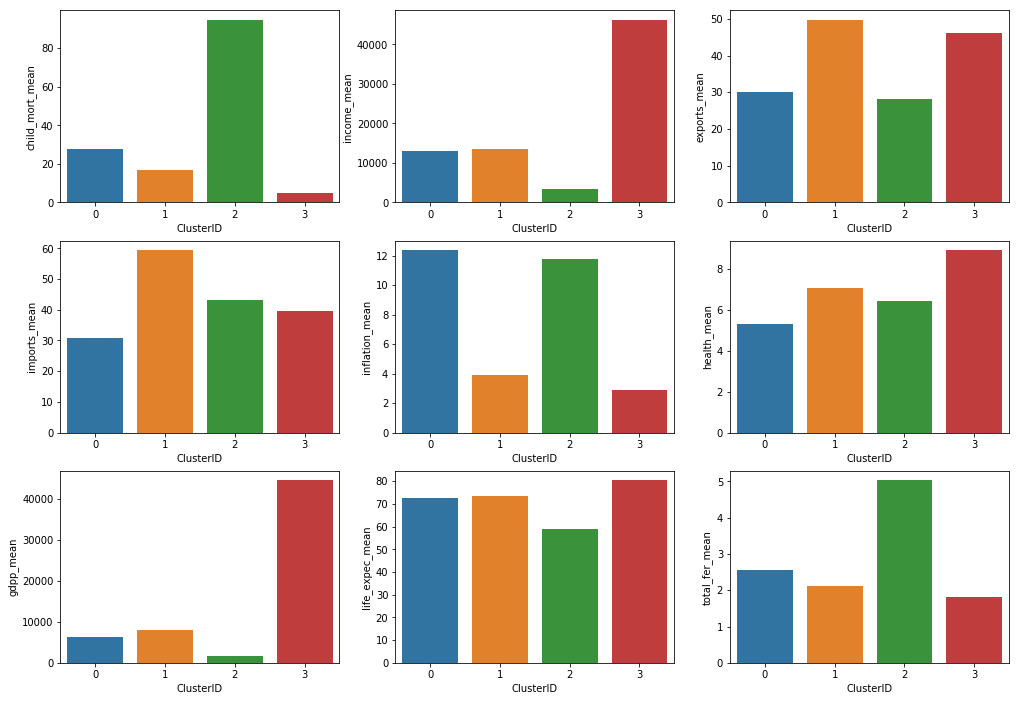

In [85]:
# subplots 
plt.figure(figsize=(17,12))
# subplot 1
plt.subplot(3, 3, 1)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.child_mort_mean)

# subplot 2
plt.subplot(3, 3, 2)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.income_mean)

# subplot 3
plt.subplot(3, 3, 3)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.exports_mean)

# subplot 4
plt.subplot(3, 3, 4)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.imports_mean)

# subplot 5
plt.subplot(3, 3, 5)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.inflation_mean)

# subplot 6
plt.subplot(3, 3, 6)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.health_mean)

# subplot 7
plt.subplot(3, 3, 7)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.gdpp_mean)

# subplot 8
plt.subplot(3, 3, 8)
sns.barplot(x=df_hc_pca.ClusterID, y=df_km_pca.life_expec_mean)

# subplot 9
plt.subplot(3, 3, 9)
sns.barplot(x=df_km_pca.ClusterID, y=df_km_pca.total_fer_mean)

plt.show()

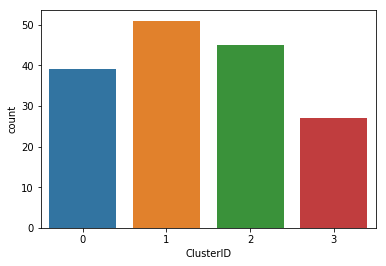

In [84]:
sns.countplot(x = "ClusterID", data = df_km)
plt.show()

In [93]:
df_outlier = df_outlier.drop('_merge', axis = 1)
df_outlier

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [91]:
df_km_pca

,ClusterID,child_mort_mean,income_mean,exports_mean,imports_mean,inflation_mean,health_mean,gdpp_mean,life_expec_mean,total_fer_mean
0,0,27.853846,13026.923077,29.986897,30.729895,12.404513,5.321795,6241.435897,72.371795,2.558718
1,1,17.021569,13470.980392,49.800000,59.509804,3.936824,7.055294,7970.509804,73.317647,2.125686
2,2,94.857778,3493.177778,28.289111,43.026667,11.816111,6.407778,1713.377778,58.926667,5.038667
3,3,4.962963,46259.259259,46.248148,39.525926,2.921222,8.919259,44670.370370,80.481481,1.819630


### According to the mean values of k-mean dataset we will assign the cluster IDs to outliers country manually.

In [98]:
df_outlier['ClusterID'] = ''

In [107]:
df_outlier.set_value(91,'ClusterID',3)
df_outlier.set_value(98,'ClusterID',1)
df_outlier.set_value(131,'ClusterID',0)
df_outlier.set_value(133,'ClusterID',3)
df_outlier.set_value(159,'ClusterID',0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,0


In [108]:
df_outlier

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,0


In [112]:
df_last = pd.concat([df_km,df_outlier], axis = 0)
df_last.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
